In [0]:
spark


SparkSession - hive 
 
 
 SparkContext 

 Spark UI 

 
 Version 
 v3.3.2 
 Master 
 local[8] 
 AppName 
 Databricks Shell

In [0]:
from pyspark.sql import SparkSession
from pyspark.sql.types import StructField, StructType, IntegerType, StringType, BooleanType,DoubleType, DateType, DecimalType

#create session
spark=SparkSession.builder.appName("WCC Data Analysis").getOrCreate()

In [0]:
#ball_by_ball_df = spark.read.format("csv").option("header", "true").option("inferSchema","true").load("s3://t20-world-cup-data-analysis-project/town.csv")

In [0]:
ball_by_ball_schema= StructType([
    StructField("index", IntegerType(), True),
    StructField("match_id", IntegerType(), True),
    StructField("inningNumber", IntegerType(), True),
    StructField("overNumber", IntegerType(), True),
    StructField("ballNumber", IntegerType(), True),
    StructField("oversUnique", DoubleType(), True),
    StructField("oversActual", DoubleType(), True),
    StructField("batsmanPlayerId", IntegerType(), True),
    StructField("bowlerPlayerId", IntegerType(), True),
    StructField("pitchLine", StringType(), True),
    StructField("pitchLength", StringType(), True),
    StructField("isFour", BooleanType(), True),
    StructField("isSix", BooleanType(), True),
    StructField("isWicket", BooleanType(), True),
    StructField("byes", IntegerType(), True),
    StructField("legbyes", IntegerType(), True),
    StructField("wides", IntegerType(), True),
    StructField("noballs", IntegerType(), True),
    StructField("penalties", IntegerType(), True),
    StructField("run", IntegerType(), True),
    StructField("batsmanRuns", IntegerType(), True),
    StructField("totalRuns", IntegerType(), True),
    StructField("totalWickets", IntegerType(), True),
    StructField("outPlayerId", DoubleType(), True),
    StructField("shotType", StringType(), True)
])
ball_by_ball_df = spark.read.schema(ball_by_ball_schema).format("csv").option("header","true").load("s3://t20-world-cup-data-analysis-project/ballbyball.csv")


In [0]:
country_schema = StructType([
    StructField("Country ID", StringType(), True),
    StructField("Country Name", StringType(), True),
    StructField("Country Abbreviation", StringType(), True)
])
country_df = spark.read.schema(country_schema).format("csv").option("header","true").load("s3://t20-world-cup-data-analysis-project/country.csv")

In [0]:
ground_schema = StructType([
    StructField("Ground ID", StringType(), True),
    StructField("Ground Name", StringType(), True),
    StructField("Ground Slug", StringType(), True),
    StructField("Town ID", StringType(), True),
    StructField("Capacity", StringType(), True)
])
ground_df = spark.read.schema(ground_schema).format("csv").option("header","true").load("s3://t20-world-cup-data-analysis-project/ground.csv")

In [0]:
match_schema = StructType([
StructField("season_id", StringType(), True),
    StructField("match_id", StringType(), True),
    StructField("slug", StringType(), True),
    StructField("title", StringType(), True),
    StructField("time_of_day", StringType(), True),
    StructField("date", DateType(), True),
    StructField("time", StringType(), True),
    StructField("status", StringType(), True),
    StructField("status_description", StringType(), True),
    StructField("winner_team_id", StringType(), True),
    StructField("toss_winner_team_id", StringType(), True),
    StructField("toss_choice", StringType(), True),
    StructField("ground_id", StringType(), True),
    StructField("team_1_id", StringType(), True),
    StructField("team_2_id", StringType(), True),
    StructField("team_1_score", StringType(), True),
    StructField("team_1_scoreInfo", StringType(), True),
    StructField("team_2_scoreInfo", StringType(), True)
])
match_df = spark.read.schema(match_schema).format("csv").option("header","true").load("s3://t20-world-cup-data-analysis-project/matches.csv")

In [0]:
players_schema = StructType([
    StructField("ID", StringType(), True),
    StructField("Name", StringType(), True),
    StructField("Role", StringType(), True),
    StructField("Full Name", StringType(), True),
    StructField("Image", StringType(), True),
    StructField("DOB", StringType(), True),
    StructField("Batting Style (s)", StringType(), True),
    StructField("Bowling Style (s)", StringType(), True),
    StructField("Batting Style (l)", StringType(), True),
    StructField("Bowling Style (l)", StringType(), True),
    StructField("Team ID", StringType(), True),
    StructField("Playing Role", StringType(), True)
    ])
players_df = spark.read.schema(players_schema).format("csv").option("header","true").load("s3://t20-world-cup-data-analysis-project/players.csv")

In [0]:
season_schema = StructType([
    StructField("season_id", StringType(), True),
    StructField("name", StringType(), True),
    StructField("year", StringType(), True),
    StructField("description", StringType(), True),
    StructField("season", StringType(), True),
    StructField("startDate", DateType(), True),
    StructField("endDate", DateType(), True),
    StructField("totalSquads", StringType(), True)
    ])
season_df = spark.read.schema(season_schema).format("csv").option("header","true").load("s3://t20-world-cup-data-analysis-project/season.csv")

In [0]:
team_schema=StructType([
    StructField("Team ID", StringType(), True),
    StructField("Team Name", StringType(), True),
    StructField("Team Abbreviation", StringType(), True),
    StructField("Image URL", StringType(), True),
    StructField("Country ID", StringType(), True)
    ])
team_df = spark.read.schema(team_schema).format("csv").option("header","true").load("s3://t20-world-cup-data-analysis-project/team.csv")

In [0]:
town_schema = StructType([
    StructField("Town ID", IntegerType(), True),
    StructField("Town Name", StringType(), True),
    StructField("Country ID", IntegerType(), True)
])
town_df = spark.read.schema(town_schema).format("csv").option("header","true").load("s3://t20-world-cup-data-analysis-project/town.csv")

In [0]:
# Register the DataFrame as a temporary SQL table
ball_by_ball_df.createOrReplaceTempView("ball_by_ball")
country_df.createOrReplaceTempView("country")
ground_df.createOrReplaceTempView("ground")
match_df.createOrReplaceTempView("matches")
players_df.createOrReplaceTempView("players")
season_df.createOrReplaceTempView("season")
team_df.createOrReplaceTempView("team")
town_df.createOrReplaceTempView("town")


In [0]:
#Toss Impact Analysis
# SQL query to calculate the percentage of matches where the toss winner also won the match
toss_impact_query = """
SELECT 
    COUNT(*) AS total_matches,
    SUM(CASE WHEN toss_winner_team_id = winner_team_id THEN 1 ELSE 0 END) AS toss_winner_wins,
    (SUM(CASE WHEN toss_winner_team_id = winner_team_id THEN 1 ELSE 0 END) / COUNT(*)) * 100 AS toss_win_percentage
FROM 
    matches
"""

# Execute the query
toss_impact_df = spark.sql(toss_impact_query)
toss_impact_df.show()


+-------------+----------------+-------------------+
|total_matches|toss_winner_wins|toss_win_percentage|
+-------------+----------------+-------------------+
|          296|             122|  41.21621621621622|
+-------------+----------------+-------------------+



In [0]:
# SQL query to calculate the average score for each team across different seasons
team_performance_query = """
SELECT 
    season_id,
    team_1_id AS team_id,
    AVG(CAST(team_1_score AS INT)) AS avg_team_1_score,
    AVG(CASE WHEN winner_team_id = team_1_id THEN 1 ELSE 0 END) * 100 AS win_percentage
FROM 
    matches
GROUP BY 
    season_id, team_1_id

union

SELECT 
    season_id,
    team_2_id AS team_id,
    AVG(CAST(team_2_scoreInfo AS INT)) AS avg_team_2_score,
    AVG(CASE WHEN winner_team_id = team_2_id THEN 1 ELSE 0 END) * 100 AS win_percentage
FROM 
    matches
GROUP BY 
    season_id, team_2_id
ORDER BY 
    season_id, team_id
"""

# Execute the query
team_performance_df = spark.sql(team_performance_query)
team_performance_df.show()


+---------+-------+----------------+-----------------+
|season_id|team_id|avg_team_1_score|   win_percentage|
+---------+-------+----------------+-----------------+
|    10291|      1|            null|             50.0|
|    10291|      1|            null|            100.0|
|    10291|     15|            null|             50.0|
|    10291|     15|            null|              0.0|
|    10291|     19|            null|              0.0|
|    10291|      2|            null|             50.0|
|    10291|     25|            null|             50.0|
|    10291|     25|            null|              0.0|
|    10291|     29|            null|              0.0|
|    10291|      3|           172.0|33.33333333333333|
|    10291|      3|            null|            100.0|
|    10291|     30|            null|33.33333333333333|
|    10291|     37|            null|33.33333333333333|
|    10291|      4|            null|83.33333333333334|
|    10291|     40|           127.0|             75.0|
|    10291

In [0]:

# SQL query to get the top 10 batsmen by total runs scored with their names
top_batsmen_with_names_query = """
SELECT 
    p.Name AS batsman_name,
    b.batsmanPlayerId,
    SUM(b.batsmanRuns) AS total_runs
FROM 
    ball_by_ball b
JOIN 
    players p
ON 
    b.batsmanPlayerId = p.ID
GROUP BY 
    p.Name, b.batsmanPlayerId
ORDER BY 
    total_runs DESC
LIMIT 10
"""

# Execute the query
top_batsmen_with_names_df = spark.sql(top_batsmen_with_names_query)
top_batsmen_with_names_df.show()


+----------------+---------------+----------+
|    batsman_name|batsmanPlayerId|total_runs|
+----------------+---------------+----------+
|         V Kohli|          49752|      1141|
|       RG Sharma|          48405|       875|
|DPMD Jayawardene|           6315|       857|
|        CH Gayle|           7568|       848|
|      TM Dilshan|           7419|       832|
|       DA Warner|          48739|       806|
|      JC Buttler|          53271|       799|
|   KS Williamson|          51088|       699|
| Shakib Al Hasan|          48277|       675|
|  AB de Villiers|          46533|       667|
+----------------+---------------+----------+



In [0]:
# SQL query to get the top 10 bowlers by total wickets taken with their names
top_bowlers_with_names_query = """
SELECT 
    p.Name AS bowler_name,
    b.bowlerPlayerId,
    SUM(CASE WHEN b.isWicket = true THEN 1 ELSE 0 END) AS total_wickets
FROM 
    ball_by_ball b
JOIN 
    players p
ON 
    b.bowlerPlayerId = p.ID
GROUP BY 
    p.Name, b.bowlerPlayerId
ORDER BY 
    total_wickets DESC
LIMIT 10
"""

# Execute the query
top_bowlers_with_names_df = spark.sql(top_bowlers_with_names_query)
top_bowlers_with_names_df.show()


+---------------+--------------+-------------+
|    bowler_name|bowlerPlayerId|total_wickets|
+---------------+--------------+-------------+
|Shakib Al Hasan|         48277|           45|
|     SL Malinga|         45105|           39|
|    Saeed Ajmal|         19930|           37|
|     BAW Mendis|         50377|           36|
|       R Ashwin|         12894|           33|
|       DW Steyn|         47154|           32|
|     TG Southee|         49108|           31|
|   PW Hasaranga|         78239|           31|
|       DJ Bravo|         45257|           30|
|  Shahid Afridi|          4169|           28|
+---------------+--------------+-------------+



In [0]:
# SQL query to aggregate performance by role with player names
role_effectiveness_with_names_query = """
SELECT 
    p.Name AS player_name,
    p.Role,
    SUM(b.batsmanRuns) AS total_runs,
    SUM(CASE WHEN b.isWicket = true THEN 1 ELSE 0 END) AS total_wickets
FROM 
    ball_by_ball b
JOIN 
    players p
ON 
    b.batsmanPlayerId = p.ID OR b.bowlerPlayerId = p.ID
GROUP BY 
    p.Name, p.Role
ORDER BY 
    total_runs DESC, total_wickets DESC
"""

# Execute the query
role_effectiveness_with_names_df = spark.sql(role_effectiveness_with_names_query)
role_effectiveness_with_names_df.show()


+----------------+----+----------+-------------+
|     player_name|Role|total_runs|total_wickets|
+----------------+----+----------+-------------+
| Shakib Al Hasan|   P|      1420|           72|
|        DJ Bravo|   P|      1205|           53|
|         V Kohli|   P|      1186|           17|
|   Shahid Afridi|   P|      1155|           51|
|       SR Watson|   P|      1103|           43|
|        CH Gayle|   C|      1080|           35|
|      AD Mathews|   P|       932|           32|
|       RG Sharma|   P|       925|           28|
|      TM Dilshan|   P|       860|           29|
|DPMD Jayawardene|   P|       857|           21|
|       DA Warner|   P|       806|           32|
|      JC Buttler|   P|       799|           20|
|   Mohammad Nabi|   P|       791|           38|
| Mohammad Hafeez|   P|       751|           29|
|      GJ Maxwell|   P|       751|           27|
|   KS Williamson|   P|       732|           19|
|       JP Duminy|   P|       718|           21|
|      MN Samuels|  

In [0]:
# SQL query to calculate the total runs scored and wickets taken by players across seasons
player_performance_over_seasons_query = """
SELECT 
    s.year AS season_year,
    p.Name AS player_name,
    SUM(b.batsmanRuns) AS total_runs,
    SUM(CASE WHEN b.isWicket = true THEN 1 ELSE 0 END) AS total_wickets
FROM 
    ball_by_ball b
JOIN 
    players p
ON 
    b.batsmanPlayerId = p.ID OR b.bowlerPlayerId = p.ID
JOIN 
    matches m
ON 
    b.match_id = m.match_id
JOIN 
    season s
ON 
    m.season_id = s.season_id
GROUP BY 
    s.year, p.Name
ORDER BY 
    s.year, total_runs DESC
"""

# Execute the query
player_performance_over_seasons_df = spark.sql(player_performance_over_seasons_query)
player_performance_over_seasons_df.show(truncate=False)


+-----------+--------------+----------+-------------+
|season_year|player_name   |total_runs|total_wickets|
+-----------+--------------+----------+-------------+
|2009       |DJ Bravo      |664       |28           |
|2009       |TM Dilshan    |654       |12           |
|2009       |Shahid Afridi |638       |32           |
|2009       |JH Kallis     |624       |12           |
|2009       |CH Gayle      |568       |10           |
|2009       |ST Jayasuriya |546       |18           |
|2009       |Shoaib Malik  |416       |12           |
|2009       |LMP Simmons   |408       |22           |
|2009       |Yuvraj Singh  |404       |10           |
|2009       |JE Taylor     |378       |18           |
|2009       |Kamran Akmal  |376       |14           |
|2009       |SJ Benn       |374       |8            |
|2009       |AB de Villiers|372       |8            |
|2009       |AR Cusack     |362       |20           |
|2009       |KC Sangakkara |354       |10           |
|2009       |AD Mathews    |

In [0]:
# SQL query to calculate the match frequency and outcomes based on the time of day
match_outcomes_time_of_day_query = """
SELECT 
    m.time_of_day,
    COUNT(*) AS total_matches,
    SUM(CASE WHEN m.winner_team_id = m.team_1_id THEN 1 ELSE 0 END) AS team_1_wins,
    SUM(CASE WHEN m.winner_team_id = m.team_2_id THEN 1 ELSE 0 END) AS team_2_wins
FROM 
    matches m
GROUP BY 
    m.time_of_day
ORDER BY 
    total_matches DESC
"""

# Execute the query
match_outcomes_time_of_day_df = spark.sql(match_outcomes_time_of_day_query)
match_outcomes_time_of_day_df.show(truncate=False)


+-----------+-------------+-----------+-----------+
|time_of_day|total_matches|team_1_wins|team_2_wins|
+-----------+-------------+-----------+-----------+
|night      |135          |47         |58         |
|day        |94           |31         |32         |
|daynight   |67           |38         |25         |
+-----------+-------------+-----------+-----------+



In [0]:
# SQL query to calculate match outcomes across different seasons
match_outcomes_season_query = """
SELECT 
    s.year AS season_year,
    COUNT(*) AS total_matches,
    SUM(CASE WHEN m.winner_team_id = m.team_1_id THEN 1 ELSE 0 END) AS team_1_wins,
    SUM(CASE WHEN m.winner_team_id = m.team_2_id THEN 1 ELSE 0 END) AS team_2_wins
FROM 
    matches m
JOIN 
    season s
ON 
    m.season_id = s.season_id
GROUP BY 
    s.year
ORDER BY 
    s.year ASC
"""

# Execute the query
match_outcomes_season_df = spark.sql(match_outcomes_season_query)
match_outcomes_season_df.show(truncate=False)


+-----------+-------------+-----------+-----------+
|season_year|total_matches|team_1_wins|team_2_wins|
+-----------+-------------+-----------+-----------+
|2009       |54           |32         |22         |
|2010       |27           |15         |11         |
|2012/13    |27           |14         |10         |
|2013/14    |35           |14         |21         |
|2015/16    |35           |18         |15         |
|2021/22    |45           |16         |29         |
|2022/23    |45           |23         |18         |
|2024       |55           |0          |0          |
+-----------+-------------+-----------+-----------+



In [0]:
# SQL query to calculate total runs scored and total wickets by overNumber

scoring_patterns_by_overs_query = """
SELECT 
    overNumber,
    COUNT(*) AS total_balls,
    SUM(CASE WHEN isFour = true THEN 1 ELSE 0 END) AS total_fours,
    SUM(CASE WHEN isSix = true THEN 1 ELSE 0 END) AS total_sixes,
    SUM(run) AS total_runs,
    SUM(CASE WHEN isWicket = true THEN 1 ELSE 0 END) AS total_wickets
FROM 
    ball_by_ball
GROUP BY 
    overNumber
ORDER BY 
    overNumber
"""

# Execute the query
scoring_patterns_by_overs_df = spark.sql(scoring_patterns_by_overs_query)
scoring_patterns_by_overs_df.show(truncate=False)

+----------+-----------+-----------+-----------+----------+-------------+
|overNumber|total_balls|total_fours|total_sixes|total_runs|total_wickets|
+----------+-----------+-----------+-----------+----------+-------------+
|1         |2966       |322        |36         |2730      |109          |
|2         |2966       |377        |69         |3222      |120          |
|3         |2947       |362        |95         |3311      |139          |
|4         |2927       |416        |96         |3593      |134          |
|5         |2913       |416        |104        |3655      |127          |
|6         |2902       |370        |82         |3390      |155          |
|7         |2832       |188        |61         |2891      |93           |
|8         |2809       |175        |67         |2943      |112          |
|9         |2791       |200        |83         |3112      |122          |
|10        |2766       |190        |76         |3105      |118          |
|11        |2761       |197        |10

In [0]:
# SQL query to calculate total runs scored and total wickets by ballNumber within an over
scoring_patterns_by_balls_query = """
SELECT 
    overNumber,
    ballNumber,
    COUNT(*) AS total_balls,
    SUM(CASE WHEN isFour = true THEN 1 ELSE 0 END) AS total_fours,
    SUM(CASE WHEN isSix = true THEN 1 ELSE 0 END) AS total_sixes,
    SUM(run) AS total_runs,
    SUM(CASE WHEN isWicket = true THEN 1 ELSE 0 END) AS total_wickets
FROM 
    ball_by_ball
GROUP BY 
    overNumber, ballNumber
ORDER BY 
    overNumber, ballNumber
"""

# Execute the query
scoring_patterns_by_balls_df = spark.sql(scoring_patterns_by_balls_query)
scoring_patterns_by_balls_df.show(truncate=False)

+----------+----------+-----------+-----------+-----------+----------+-------------+
|overNumber|ballNumber|total_balls|total_fours|total_sixes|total_runs|total_wickets|
+----------+----------+-----------+-----------+-----------+----------+-------------+
|1         |1         |472        |37         |2          |347       |9            |
|1         |2         |472        |53         |4          |439       |17           |
|1         |3         |472        |57         |5          |434       |27           |
|1         |4         |472        |57         |8          |485       |16           |
|1         |5         |472        |56         |8          |493       |14           |
|1         |6         |472        |47         |7          |410       |19           |
|1         |7         |106        |11         |2          |95        |6            |
|1         |8         |22         |2          |0          |19        |1            |
|1         |9         |4          |1          |0          |4     

In [0]:
from pyspark.sql.functions import col, sum as spark_sum

# Register ball_by_ball_df and players_df as temporary SQL tables
ball_by_ball_df.createOrReplaceTempView("ball_by_ball")
players_df.createOrReplaceTempView("players")
season_df.createOrReplaceTempView("seasons")

# SQL query to aggregate total runs by player and season
total_runs_by_player_season_query = """
SELECT 
    p.Name AS player_name,
    s.year AS season_year,
    SUM(b.batsmanRuns) AS total_runs
FROM 
    ball_by_ball b
JOIN 
    players p
ON 
    b.batsmanPlayerId = p.ID
JOIN 
    matches m
ON 
    b.match_id = m.match_id
JOIN 
    seasons s
ON 
    m.season_id = s.season_id
GROUP BY 
    p.Name, s.year
ORDER BY 
    total_runs DESC
"""

# Execute the query
total_runs_by_player_season_df = spark.sql(total_runs_by_player_season_query)
total_runs_by_player_season_df.createOrReplaceTempView("total_runs_by_player_season")


In [0]:
# SQL query to get the top 10 highest scorers
top_10_scorers_query = """
SELECT 
    player_name,
    total_runs,
    season_year
FROM 
    total_runs_by_player_season
ORDER BY 
    total_runs DESC
LIMIT 10
"""

# Execute the query
top_10_scorers_df = spark.sql(top_10_scorers_query)
top_10_scorers_df.show(truncate=False)


+--------------+----------+-----------+
|player_name   |total_runs|season_year|
+--------------+----------+-----------+
|TM Dilshan    |634       |2009       |
|JH Kallis     |476       |2009       |
|CH Gayle      |386       |2009       |
|Kamran Akmal  |376       |2009       |
|AB de Villiers|372       |2009       |
|KC Sangakkara |354       |2009       |
|ST Jayasuriya |354       |2009       |
|Shahid Afridi |352       |2009       |
|Younis Khan   |344       |2009       |
|V Kohli       |319       |2013/14    |
+--------------+----------+-----------+



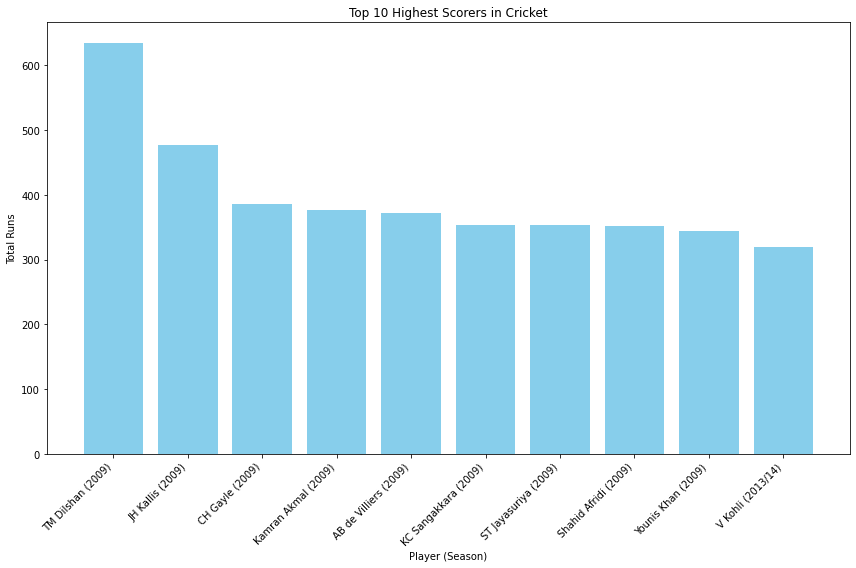

In [0]:
# Convert the top 10 scorers Spark DataFrame to a Pandas DataFrame
top_10_scorers_pd = top_10_scorers_df.toPandas()
import matplotlib.pyplot as plt

# Plotting the bar graph
plt.figure(figsize=(12, 8))
plt.bar(top_10_scorers_pd['player_name'] + ' (' + top_10_scorers_pd['season_year'].astype(str) + ')', top_10_scorers_pd['total_runs'], color='skyblue')
plt.xlabel('Player (Season)')
plt.ylabel('Total Runs')
plt.title('Top 10 Highest Scorers in Cricket')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()  # Adjust layout to make room for rotated x-axis labels
plt.show()


In [0]:
from pyspark.sql.functions import col

# Calculate average runs per ball for each bowler
average_runs_per_ball_df = runs_per_bowler_df.withColumn(
    "average_runs_per_ball",
    col("total_runs") / col("total_balls")
)


In [0]:
# Register the average runs DataFrame as a temporary SQL table
average_runs_per_ball_df.createOrReplaceTempView("average_runs_per_ball")

# SQL query to get the top 10 bowlers with the highest average runs per ball
top_10_bowlers_query = """
SELECT 
    p.Name AS bowler_name,
    a.average_runs_per_ball
FROM 
    average_runs_per_ball a
JOIN 
    players p
ON 
    a.bowlerPlayerId = p.ID
ORDER BY 
    average_runs_per_ball DESC
LIMIT 10
"""

# Execute the query
top_10_bowlers_df = spark.sql(top_10_bowlers_query)
top_10_bowlers_df.show(truncate=False)


+-------------------+---------------------+
|bowler_name        |average_runs_per_ball|
+-------------------+---------------------+
|CM Wright          |3.3333333333333335   |
|JD Ryder           |3.1666666666666665   |
|JH Stander         |3.0714285714285716   |
|IE O'Brien         |3.0                  |
|AJ Finch           |3.0                  |
|Izatullah Dawlatzai|2.6666666666666665   |
|Fawad Alam         |2.5                  |
|Aftab Alam         |2.5                  |
|PC Connell         |2.3333333333333335   |
|Mominul Haque      |2.3333333333333335   |
+-------------------+---------------------+



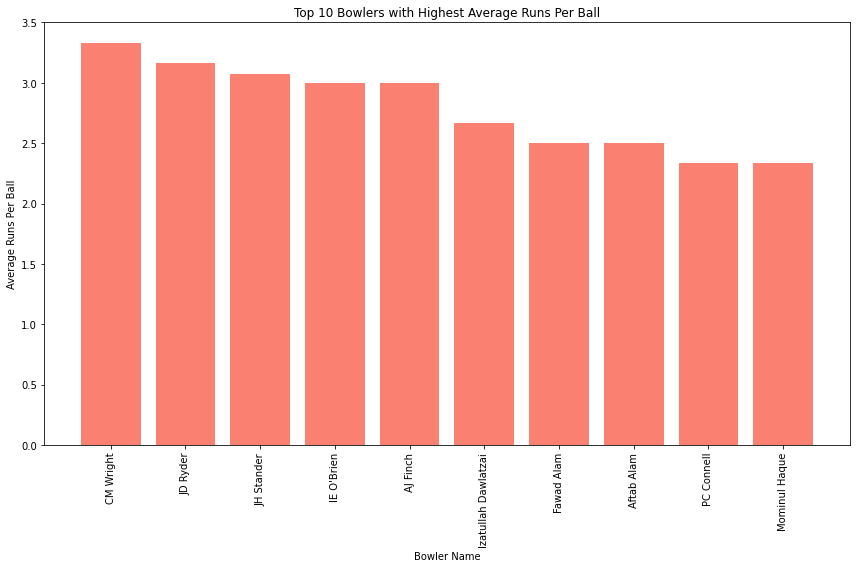

In [0]:
import matplotlib.pyplot as plt

# Convert the DataFrame to Pandas for plotting
top_10_bowlers_pd = top_10_bowlers_df.toPandas()

# Plotting the bar graph
plt.figure(figsize=(12, 8))
plt.bar(top_10_bowlers_pd['bowler_name'], top_10_bowlers_pd['average_runs_per_ball'], color='salmon')
plt.xlabel('Bowler Name')
plt.ylabel('Average Runs Per Ball')
plt.title('Top 10 Bowlers with Highest Average Runs Per Ball')
plt.xticks(rotation=90)
plt.tight_layout()  # Adjust layout to make room for rotated x-axis labels
plt.show()


In [0]:
# Register DataFrames as temporary SQL tables
match_df.createOrReplaceTempView("matches")
team_df.createOrReplaceTempView("teams")

# SQL query to get the number of games won and lost by each toss-winning team
query = """
SELECT 
    toss_winner_team_id AS team_id,
    COUNT(*) AS total_games,
    SUM(CASE WHEN toss_winner_team_id = winner_team_id THEN 1 ELSE 0 END) AS total_wins,
    SUM(CASE WHEN toss_winner_team_id <> winner_team_id THEN 1 ELSE 0 END) AS total_losses
FROM 
    matches
GROUP BY 
    toss_winner_team_id
"""

# Execute the query
toss_winner_summary_df = spark.sql(query)

# Join with team names for better readability
team_query = """
SELECT 
    t.`Team ID` AS team_id,
    t.`Team Name` AS team_name
FROM 
    teams t
"""

# Execute the query
team_names_df = spark.sql(team_query)

# Join the summary with team names
toss_winner_summary_with_names_df = toss_winner_summary_df.join(
    team_names_df,
    toss_winner_summary_df.team_id == team_names_df.team_id,
    'left'
).select(
    'team_name',
    'total_games',
    'total_wins',
    'total_losses'
)


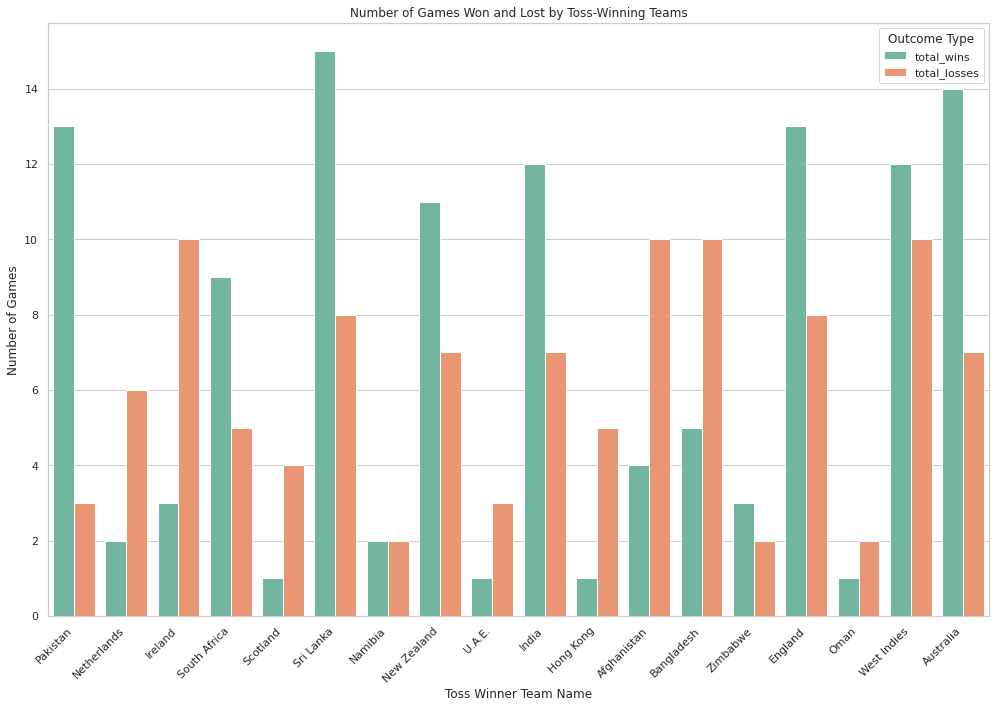

In [0]:
# Convert to Pandas DataFrame
toss_winner_summary_with_names_pd = toss_winner_summary_with_names_df.toPandas()

# Melt DataFrame for better visualization format
toss_winner_summary_melted = toss_winner_summary_with_names_pd.melt(
    id_vars='team_name', 
    value_vars=['total_wins', 'total_losses'], 
    var_name='outcome_type', 
    value_name='count'
)

# Visualization with seaborn
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style of the visualization
sns.set(style="whitegrid")

# Create the bar plot
plt.figure(figsize=(14, 10))
sns.barplot(x='team_name', y='count', hue='outcome_type', data=toss_winner_summary_melted, palette='Set2')
plt.xlabel('Toss Winner Team Name')
plt.ylabel('Number of Games')
plt.title('Number of Games Won and Lost by Toss-Winning Teams')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Outcome Type')
plt.tight_layout()
plt.show()


In [0]:
# Register DataFrames as temporary SQL tables
ball_by_ball_df.createOrReplaceTempView("ball_by_ball")

# SQL query to count the occurrences of each shot type
query = """
SELECT 
    shotType AS shot_type,
    COUNT(*) AS count
FROM 
    ball_by_ball
WHERE 
    isWicket = TRUE
GROUP BY 
    shotType
ORDER BY 
    count DESC
"""

# Execute the query
shot_summary_df = spark.sql(query)


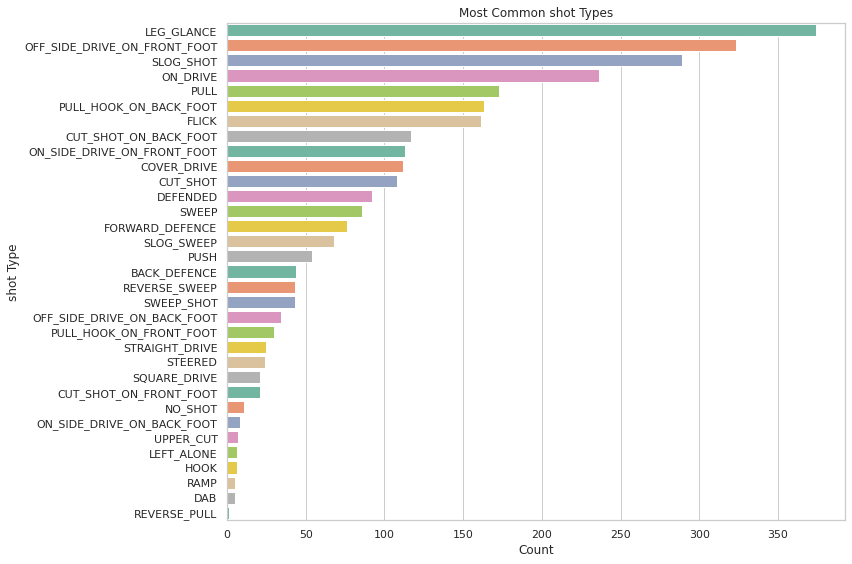

In [0]:
# Convert to Pandas DataFrame
shot_summary_pd = shot_summary_df.toPandas()

# Visualization with seaborn
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style of the visualization
sns.set(style="whitegrid")

# Create the bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x='count', y='shot_type', data=shot_summary_pd, palette='Set2')
plt.xlabel('Count')
plt.ylabel('shot Type')
plt.title('Most Common shot Types')
plt.tight_layout()
plt.show()
